# Regresion Lineal


uso de regresión lineal para el caso house prices: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## 1. Leer el dato usando Panda

In [1]:
# importar la libreria panda en python 
import pandas as pd

In [148]:
# leer los datos desde local archivo train.csv
dato = pd.read_csv("train.csv");
test_df = pd.read_csv("test.csv");

In [153]:
# mostrar las primeras 5 filas
# de la columna SalePrice
dato['Neighborhood'].head()
#test_df['Neighborhood'].head()

0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
Name: Neighborhood, dtype: object

In [114]:
# mostrar las ultimas 5 filas de todos los datos
dato.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [115]:
# mostrar cantidad de datos filas x columnas
# de la descripcion del problema son 79 variables + id = 80 columnas
dato.shape

(1460, 81)

Sobre las caracteristicas

- **SalePrice**: the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification 
... hasta 79 caracateristicas 

Respuesta 

- **SalesPrice**: sales prices of the


## 2. Exploración de data

primero para hacer la exploración de los datos, debemos entender el problema para luego estudiar nuestros datos y la dependencia que presentan cada una de estas variables con respecto a "SalesPrice" que es lo que al final lo que nos importa, también entenderemos como las variables dependientes e independientes son relativos, limpiaremos nuestros datos perdidos y las variables atipicas, finalmente quedara listo para aplicarle una regresión lineal y poder hacer el test.

In [116]:
# mostrar los nombres de la columnas
# nombre de las variables a anlizar
dato.tail(0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


al analizar los datos de manera rapida podemos darnos cuenta que existen algunas variables que no son tan necesarias para nuestro caso de estudio, como por ejemplo 'Masonry veneer type' (tipo maponsteria), o calificaciones de exterior de tipo 'excelente', bueno, pobre, realmente esto no aporta mucho, por ejemplo al nivel de la pendiente del suelo 'LandSlope' no creo que sea escencial al momento de querer comprar la casa de tus sueños, asi que primero leyendo los datos encontramos que existen numerosos datos a limpiar y de acuerdo al kernel https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python, finalmente despues de ver estas variables podemos ahora estimar la relacion alta que existe entre las variables con mayor espernza con 'SalesPrice', con la cual tenomos algunas varibles importantes como:
- OverallQual: (variable numero de calificacion general )
- YearBuilt: (año de construcción).
- TotalBsmtSF:( Total de pies cuadrados de área de sótano).
- GrLivArea: (pies cuadrados por encima del suelo).

en lo anterior tenemos nos quedamos con dos variables de construccion overallqual y yearbuilt y dos variables de espacio totalBsmtSF y GrLivArea.


In [117]:
#uso de resumen estadistico
dato['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

de acuerdo a lo anterior podemos notar que el mínimo precio de venta no es cero, asi que esto funcionará para nuestro modelo. ahora vamos a mostrar los datos en un diagrama para verlos mejor 

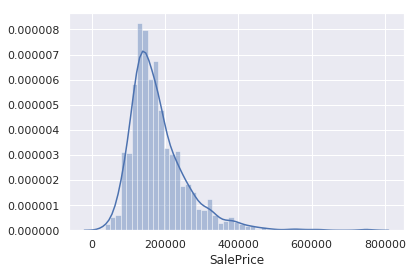

In [118]:
# importar la libreria de graficos 
import seaborn as sns

sns.distplot(dato['SalePrice']);

de acuerdo al grafico de dispersion , podemos notar tres cosas puntuales ademas de poder apreciar el ajuste de hacia una distribucion normal, asi tenemos que:
- es un distribucion normal standar
- la distribucion tiene un sesgo positivo
- un conglomerado que muestra un pico
esto que pudimos notar es muy interesante al momento de analizar nuestros datos, asi que ahora vamos a ver como podemos mostrarlo directamente en el python.

In [119]:
# sesgo(skewness)  y grado de llanura (kurtosis)
print("Skewness: %f" % dato['SalePrice'].skew())
print("Kurtosis: %f" % dato['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


de acuerdo a estos datos la asimetria sale mayor a cero y tambien la curtosis, de lo que podemos inferir que el precio de venta de las casas esta concentrada alrededor de la media y ademas hay una gran cantidad de casas que tienen un costo alto por el sesgo positivo o hacia la derecha.

## Relacion entre variables Numericas

una vez ya visto la relacion del precio de ventas de las casas, ahora vamos a mostrar la relación que se presentan de los datos seleccionados como variables importantes

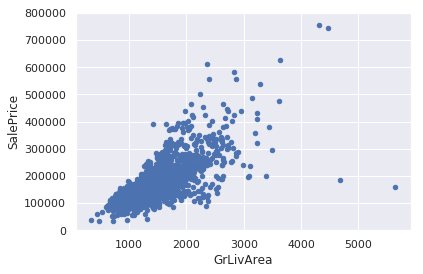

In [120]:
#grafico de dispersion enter GrLivarea eje X & SalePrice eje Y
var = 'GrLivArea'
data = pd.concat([dato['SalePrice'], dato[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

como podemos ver hay una fuerte relación entre la medida de pies cuadrados por encima del suelo con precio de venta,ahora le pondremos una regresion lineal a este mismo

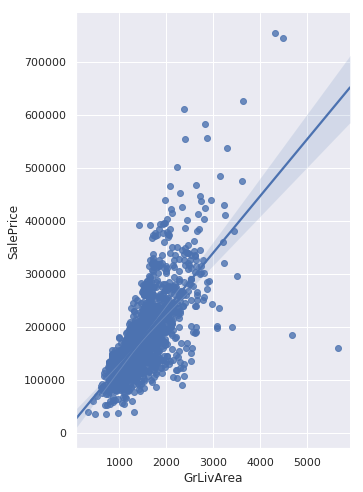

In [121]:
sns.pairplot(data, x_vars=['GrLivArea'], y_vars='SalePrice', height=7, aspect=0.7, kind='reg');

ahora haremos el ploteo para el area en pies cuadrados sotano

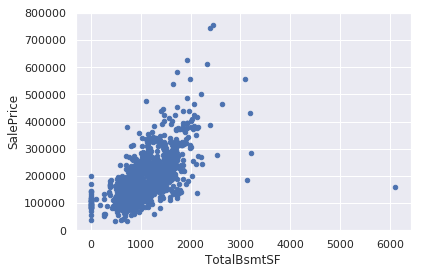

In [122]:
#grafico de dispersion enter GrLivarea eje X & SalePrice eje Y
var = 'TotalBsmtSF'
data = pd.concat([dato['SalePrice'], dato[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

## Relacion para variable caracteristica Categorica

ahora para la variable calidad para cada casa

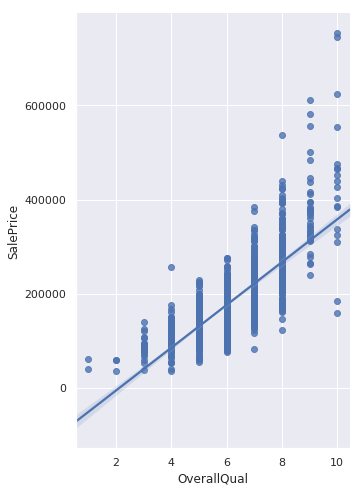

In [123]:
import matplotlib.pyplot as plt
#box plot overallqual/saleprice
#var = 'OverallQual'
#data = pd.concat([dato['SalePrice'], dato[var]], axis=1)
#f, ax = plt.subplots(figsize=(8, 6))
#fig = sns.boxplot(x=var, y="SalePrice", data=data)
#fig.axis(ymin=0, ymax=800000);
sns.pairplot(dato, x_vars=['OverallQual'], y_vars='SalePrice', height=7, aspect=0.7, kind='reg');

en lo anterior podemos escribir que la calidad aumenta a medida que el precio de venta tambien aumenta, lo cual suena evidente pues no seria un label de calidad , ahora ,tambien podemos mostrar la relación que tiene el precio de venta con el año de construcción

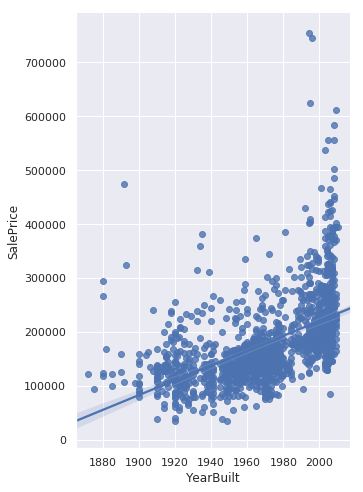

In [124]:
#box plot overallqual/saleprice
#var = 'YearBuilt'
#data = pd.concat([dato['SalePrice'], dato[var]], axis=1)
#f, ax = plt.subplots(figsize=(8, 6))
#fig = sns.boxplot(x=var, y="SalePrice", data=data)
#fig.axis(ymin=0, ymax=800000);
sns.pairplot(dato, x_vars=['YearBuilt'], y_vars='SalePrice', height=7, aspect=0.7, kind='reg');

de lo anterios pordemos decir que el precio de venta esta mas sujeto a ser apostado por casas de construcción reciente, que es algo lógico, como nota adicional no sabemos si el precio de venta "SalePrice" es constante para un cierto año lo cual variaria para el analisis detallado.

### resumen de los graficos  

para resumir la relación de las cuatro variables analizadas en graficos de dispersion anteriormente.

- Las variables númericas GrLivArea y TotalBsmtSF son linealmente relacionadas con el precio de venta oseas 'SalePrice', en ambos caso son positivos, en otra palabras mientras una variable aumenta tambien aumenta el otro. Adicionalmente, vimos que la pendiente con relacion a la variable númerica TotalBsmTSF es alta si se compara con SalePrice.
- En el caso de las Variables de caracteristica al que llamamos categorica:OverallQual y YearBuilt existe una relacion con Saleprice , en el caso de OverallQual la relacion es mas fuerte de acuerdo a la grafico mostrado anteriormente.

Ahora, bien hemos visto y analizado para estos cuatro variables en este caso particular, pero lo mas obvio es hacer para todos los datos tambien , que existe tambien una forma de analizar los datos relevantes y la relación existente entre estos y el 'SalePrice', entonces ahora vamos a ver ello.

## Analisis de correlación 

al describir y analizar de la manera anteriormente hecha , hemos pasado por alto un punto importante que se debe tomar si queremos hacer una analisis mas objetivo y cientifico, pues hemos puesto nuestro criterio personal al momento de escoger la variables con mas relación. asi que ahora vamos a ver una forma de analizar todos los datos y encontrar la relacion existente con respecto a 'SalePrice' asi que podemos distinguir cual de los datos tienen mas correlación con este y presindir de algunos que son variables con datos relativamente iguales, asi que ahora utilizaremos un grafico llamado "plasma soup" que es una mapa de calor de las variables con :
- color rojo mas claro para la correlación fuerte
### mapa de calor 

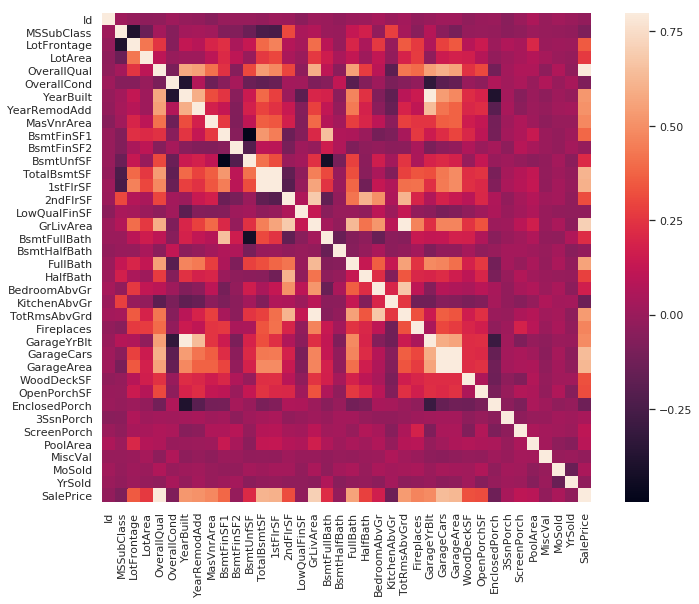

In [125]:
#matriz de correlacion con mapa de calor
matCorr = dato.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matCorr, vmax=.8, square=True);

en el grafico anterior podemos ver la correlacion existente entre las variables respecto unas de otras pero los cuadros de pixeles parecen no ser tan notorios, asi que le pondremos datos numero para observar mejor la correlación existente entre ella

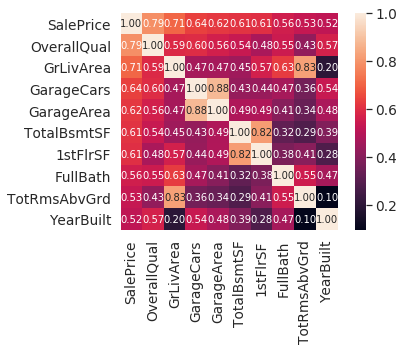

In [126]:
#para usar datos importamos numpy
import numpy as np

#saleprice matriz de correlación 
k = 10 #numero de variables para el heatmap
cols = matCorr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dato[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

en el anterior gráfico podemos ver como estan correlacionados los datos con sus valores.

- asi podemos apreciar que "SalePrice" esta fuertemente correlacionada con "OverAllQual", tambien podemo ver otras correlaciones por ejemplo 'GarageCar' esta fuerte mente correlacionada con 'GarageArea', bueno esta correlación nos indica que por ejemplo que estos dos últimos en otras palabras son lo mismo.
- Tambien, podemos apreciar que 1stFlrSF y TotalBsmtSF estas correlacionada, tanto como TotRmsAbvGrd y GrLivArea.
- Tambien se aprecia FullBath que es otra variable que aparecé con una correlacion debil lo que nos indica que no es necesario tomar este, por que es obvio, que tenga baños completos no es tan importante al momento de comprar una casa.

otra forma de ver la correlacion de algunas varibles elegidas tenemos 

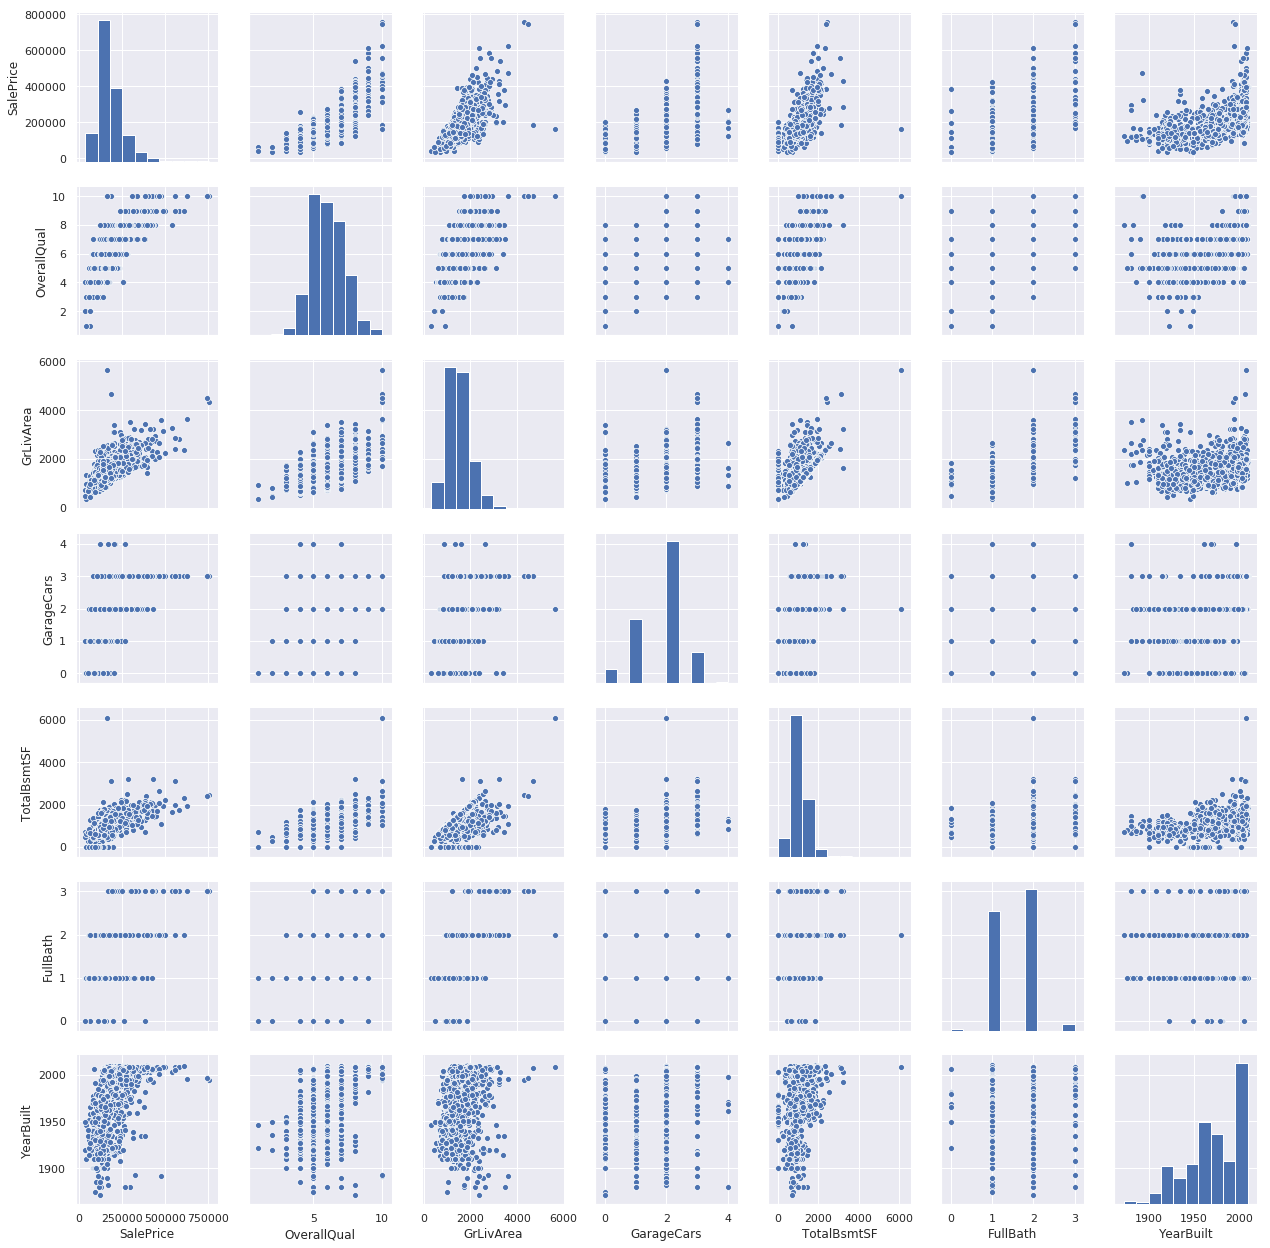

In [127]:


# diagrama de dispersion entre "SalePrice" y algunas variables de correlacion
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(dato[cols], height = 2.5)
plt.show();



aqui podemos notas que TotalBsmtSF y GrLivArea estas correlacionadas incluso casi formar una linea con algusnos puntos .
# perdida de datos

en esta parte vamos a ver las variables y sus datos para ver que datos nos son relevante, consistentes y sobre todo tenemos que asegurarnos que los datos que no tomaremos encuenta no son tan relevantes o esconden algo importante.

In [128]:
# missind data
# total : representa la cantidad de nulls que existe 
# percent : cantidad en % de null total/ 1460 
total = dato.isnull().sum().sort_values(ascending=False)
percentaje = (dato.isnull().sum()/dato.isnull().count()).sort_values(ascending=False)
miss_data = pd.concat([total, percentaje], axis=1, keys=['Total', 'Percentaje'])
#miss_data.head(20)

#missing data_test
# leer los datos desde local archivo test.csv
dato_test = pd.read_csv("test.csv",index_col=0)

#total_test = dato_test.isnull().sum().sort_values(ascending=False)
#percentaje_test = (dato_test.isnull().sum()/dato_test.isnull().count()).sort_values(ascending=False)
#miss_data_test = pd.concat([total_test, percentaje_test], axis=1, keys=['Total_test', 'Percentaje_test'])

miss_data.head(20)

,Total,Percentaje
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


acontinuación vamos analizar los datos mostrados en las primeras 25, dado que es en orden descendente.
- primero notamos que las primeras filas son 'PoolQC', 'MiscFearture', 'Alley','Fence' son variables con casito todos valores Null, los cuales definitivemente no son importantes de acuerdo a 'SalePrice', los cuales hay que eliminar.
- Segundo tenemos otro en los cuales tenemos un porcentaje mayoritario de valores Null, en este caso tomaremos encuenta los mayores a 15 debido a que estos son posiblemente valores atípicos.
- Tercero tenomos valores 'Garage...' con cantidad igual de Nulls y poercentaje 5, como estos valores son pequeños y debido ademas que existe una fuerte correlación entre estos 'Garage...' con 'GarageArea', que si tiene todos los valores ademas esta contiene la información de los GarageX, tambien serán eliminadas.
- Cuarto tenemos las variables 'Bsmt...' y segun nuestro heatmap la correlación  con 'TotalBsmtFS' asi que eliminamos tambien.
- Finalmente las variables 'MasVnr...' se puede considerar como no prescindible, ademas estas tienen una fuerte correlación con 'YearBuilt' y 'OverallQual', asi que no tenemos problemas al eliminar estos. Adicionalmente, podemos observar que solo hay un Null en la variable 'Electrical', asi que vamos a eliminar esta fila Null y mantener la variable.

resumiendo eliminaremos todos los que tienen perdida de información analizada anteriormente y eliminar la observacion Null del Electrical y mantener la variable.

In [154]:
# depurando la perdida de Datos train

dato = dato.drop((miss_data[miss_data['Total'] > 1]).index,1)
dato = dato.drop(dato.loc[dato['Electrical'].isnull()].index)
# depurando la perdida de Datos train

#dato_test = dato_test.drop((miss_data_test[miss_data_test['Total_test'] > 1]).index,1)
#dato_test = dato_test.drop(dato_test.loc[dato_test['Electrical'].isnull()].index)
test_df = test_df.drop(test_df.loc[test_df['Electrical'].isnull()].index)

#solo comprobando que no faltan datos faltantes ...
dato.isnull().sum().max() 

0

Ahora podemos ver nuestros datos resultante con los restantes 

In [130]:
dato.tail()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,147500


## Forma de la Regresion Lineal

$$y=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$$
- $y$  es la respuesta
- $\theta_0$  es el intercepto
- En este caso:
$$y=\theta_0+\theta_1\times MSSubClass+\theta_2\times MSZoning+...+\theta_3 \times SaleCondition$$


In [131]:

# Comprobar el tipo y la forma del dato

print(type(dato));
print(dato.shape)

<class 'pandas.core.frame.DataFrame'>
(1459, 63)


In [156]:
#feature_cols = list(dato.columns.values)
feature_cols = dato.select_dtypes(include=[np.number]).columns.values
# use the list to select a subset of the original DataFrame
#X = pd.DataFrame(dato, columns=feature_cols) 
#X = dato.select_dtypes(include=[np.number]).columns
X= dato[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']]
X_testdf = test_df[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']]
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008


In [133]:
# seleccionamos una columna como dataFrame

y = dato['SalePrice']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
#y = data.Sales (python 2)

# print the first 5 values
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## Division de X e Y en conjunto de training y test

In [157]:
# Numeric and categorical features in the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [158]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

y_test.head()

(1094, 33)
(365, 33)
(1094,)
(365,)


1108    181000
111     180000
1273    177000
1147    174500
368     132000
Name: SalePrice, dtype: int64

## Regresion Lineal

aqui usaremos el modelo de regresion lineal de sklern  y mas abajo la implementacion propia 

In [2]:
# dato.select_dtypes(include=[np.number]).columns.values
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

## Excercise 1 
# Try your own linear regression algorithm 
## implementacion propia Regresion Lineal
'''
import matplotlib.pyplot as plt




#Plotting Data

# dividir Population y profit en X e Y

X_df = pd.DataFrame(data.poblacion)
Y_df = pd.DataFrame(data.ganancia)

# longitud de la poblacion X
print 'length: ', len(X_df)

## Diagrama de dispersion 
plt.figure(figsize=(10,8))
plt.plot(X_df,Y_df, 'x')
plt.xlabel('Poblacion de la ciudad en 10 000s')
plt.ylabel('Ganancia en $10 000s')

## implementacion de regresion lineal con Gradiente descendiente

interaciones = 1500

alfa = 0.01

## agregamos una columna  de 1s como intercepto de X

X_df['intercepto'] = 1

## Transformacion a arrays Numpy para facilitar la matriz matematica
## iniciar el theta = 0

X = np.array(X_df)
Y = np.array(Y_df).flatten()

theta = np.array([0,0])

## mostrar los elementos de theta 2
# print theta[i]

## MINIMIZACION DE FUNCION COSTO

def fun_cost(X, Y, theta):
	
	# 	fun_cost(X, y, theta) calcula el costo de usar theta  como el parametro 
	# 	para la regresion lineal y ajustar los puntos del dato en X e Y
	# 

	## Numero de muestras de entrenamiento
	 m = len(Y)

	 ## calcular el costo con lo parametros datos

	 J = np.sum((X.dot(theta)-Y)**2)/2/m

	 return J


print "costo: ",fun_cost(X,Y,theta)


## GRADIENTE DESCENDIENTE

def grad_desc(X, Y, theta, alfa, iters):	
    # grad_desc realiza el aprendiza de theta
    # theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) actualiza theta 
    # tomando num_iters  del gradiente en cada paso y aprender de la taza alfa
    
    cost_hist = [0] * iters
    
    for iteration in range(iters):
        hypothesis = X.dot(theta)
        perdida = hypothesis-Y
        gradiente = X.T.dot(perdida)/m
        theta = theta - alfa*gradiente
        cost = fun_cost(X, Y, theta)
        cost_hist[iteration] = cost

    return theta, cost_history

(t, c) = grad_desc(X,Y,theta,alfa, interaciones)
print "t: ",t
'''

NameError: name 'X_train' is not defined

### Interpretación de los coeficientes

In [160]:
# imprimir el interceptron y los coeficientes
print(linreg.intercept_)
print(linreg.coef_)

1116377.790538539
[-1.33283221e+02  5.45926661e-01  1.63795457e+04  4.95912697e+03
  3.24064258e+02  1.57865660e+02  2.24711346e+01 -4.56588664e-01
  1.59291135e+00  2.36074573e+01  2.37008868e+01  2.76582356e+01
 -1.99939517e+01  3.13651707e+01 -1.36580544e+01 -1.54202587e+03
  1.14682655e+03  4.64789011e+02 -1.13762720e+04 -1.50457583e+04
  4.30040493e+03  3.17628051e+03  4.52631320e+03  1.76225949e+01
  2.24402642e+01 -1.26353543e+01 -1.34696364e+01 -4.65529798e+01
  5.14804061e+01  7.53295197e+01 -7.26434175e-01 -8.76015417e+02
 -1.06093049e+03]


In [161]:
# pares de caracteristicas nombre, coeficientes
# Es difícil recordar el orden, por lo que tenemos la función zip de Python 
# para emparejar los nombres de las características con los coeficientes
zip(feature_cols, linreg.coef_)

[('Id', -133.28322059576433),
 ('MSSubClass', 0.5459266609937778),
 ('LotArea', 16379.545700451383),
 ('OverallQual', 4959.126974151346),
 ('OverallCond', 324.06425816168934),
 ('YearBuilt', 157.86565964834054),
 ('YearRemodAdd', 22.471134603420033),
 ('BsmtFinSF1', -0.45658866445651325),
 ('BsmtFinSF2', 1.5929113545643256),
 ('BsmtUnfSF', 23.607457293731915),
 ('TotalBsmtSF', 23.700886795943983),
 ('1stFlrSF', 27.658235574256587),
 ('2ndFlrSF', -19.99395166473775),
 ('LowQualFinSF', 31.365170708747268),
 ('GrLivArea', -13.658054374358434),
 ('BsmtFullBath', -1542.0258684125313),
 ('BsmtHalfBath', 1146.8265466337766),
 ('FullBath', 464.7890111434346),
 ('HalfBath', -11376.271973196586),
 ('BedroomAbvGr', -15045.758338540798),
 ('KitchenAbvGr', 4300.404929648292),
 ('TotRmsAbvGrd', 3176.280505082808),
 ('Fireplaces', 4526.313195869171),
 ('GarageCars', 17.622594887311404),
 ('GarageArea', 22.440264223898154),
 ('WoodDeckSF', -12.635354308582604),
 ('OpenPorchSF', -13.469636399347875),
 

### Haciendo la Predicción

In [182]:


#feature_cols = list(dato.columns.values)
#feature_cols = dato_test.select_dtypes(include=[np.number]).columns.values
# use the list to select a subset of the original DataFrame
#X = pd.DataFrame(dato, columns=feature_cols) 
#X_test = list(dato_test.select_dtypes(include=[np.number]).columns.values)
#_test= dato_test[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
#      'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
#      'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
#      'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
#      'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
#      'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
#      'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
#      'MoSold', 'YrSold']]

#_test.head(80)
#print(X_test)
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print(y_pred.shape)
#_test
#_testdf
#_pred = linreg.predict(X_testdf)


(365,)


In [184]:
# calculate MAE using scikit-learn
#rom sklearn import metrics
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print(rmse(np.array(y_test),y_pred))
#int(np.sqrt(metrics.mean_squared_error(np.array(y_test),y_pred)))

45460.26041736068


In [183]:
print(np.array(y_test))

180000


In [142]:
print(y_pred)

[185787.22276136 180524.88992521 183627.20258625 169033.11435261
 153483.24891234 159595.233468   216543.99752106 318439.93153325
 234831.88452129 125632.26909964 205008.36705119 130599.33925304
 163774.5787679   78687.84367305 219970.50376162 158670.54022466
 150944.34959189 183149.67230997 219799.42324723 258353.38757695
 311528.06634107 232893.26593698 142172.578594   133465.63791941
 202460.60842499 139679.41146025 216939.08691819 214312.68865079
 213425.14859432 145447.52351386 156684.62145361 211155.43581786
 110340.25498825 102193.53879223 106893.37977171 142637.06735569
 123337.59755029 325950.02259491 266256.77324559 117079.33037947
 102054.57641382 252420.65724533 139771.83548166 206663.90714223
 338985.81359287  52364.89316314 229259.54235583 374521.04761151
 223714.76331984 107634.22466045 135573.76722493 182310.87962232
 159876.60864196 256159.4606133  157914.78333672  84202.19127848
 109283.18096373 189058.53231599  55102.64444803  41884.41128634
 180450.97502889 148898.0